<a href="https://colab.research.google.com/github/anandchauhan21/pomegranate_disease_prediction/blob/main/LeafdetectPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import numpy as np
import cv2
from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
print('Libraries imported...')

Libraries imported...


In [ ]:
## leaf detect
def LeafDetect(I):
    #I2 = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    Ig = cv2.GaussianBlur(I, (19, 19), 0)# apply gaussian blur
    Ihsv = rgb2hsv(Ig)# convert to HSV
    Ih = np.uint8(255 * Ihsv[:, :, 0])# convert range 0-1 to 0-255
    #Is = np.uint8(255 * Ihsv[:, :, 1])

    #plt.imshow(Ih, cmap='gray')
    #plt.title('hue image')
    #plt.show()

    Ib = 255 * np.uint8((Ih < 200) & (Ih > 50))# apply hue saturation range filtering
    #plt.imshow(Ib, cmap='gray')
    #plt.title('mask1')
    #plt.show()

    kernel = np.ones((20, 20), np.uint8)# create erosion kernel
    Ie = cv2.erode(Ib, kernel, iterations=1)# apply erosion
    #plt.imshow(Ie, cmap='gray')
    #plt.title('erode1')
    #plt.show()

    ## perform image closing using contour method
    #Ic = cv2.morphologyEx(Ie, cv2.MORPH_CLOSE, kernel)# apply morphological processing
    #plt.imshow(Ic, cmap='gray')
    #plt.title('close')
    #plt.show()

    # Filter using contour area and remove small noise
    cnts = cv2.findContours(Ib, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 10000:
            cv2.drawContours(Ib, [c], -1, (0, 0, 0), -1)

    # Morph close and invert image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))# create elliptical kernel
    Iclose = np.uint8(cv2.morphologyEx(Ib, cv2.MORPH_CLOSE, kernel, iterations=3))# apply morphology process
    # print(Iclose[50,:])
    #plt.imshow(Iclose, cmap='gray')
    #plt.title('countour')
    #plt.show()

    loc = np.array(np.where(Iclose == 255))# find the while pixels
    locr = loc[0, :]# read raw locations
    locc = loc[1, :]# read column location

    xmin = np.min(locc)
    xmax = np.max(locc)
    ymin = np.min(locr)
    ymax = np.max(locr)
    #lwidth = xmax - xmin
    #lhght = ymax - ymin

#    fig, ax = plt.subplots(1, figsize=(16, 16))
#    ax.axis('off')
#    ax.imshow(I2, cmap="gray")
#    rect = patches.Rectangle((xmin, ymin), lwidth, lhght, fill=False, linewidth=2, alpha=0.7, edgecolor='r',facecolor='none')
#    ax.add_patch(rect)
    #plt.waitforbuttonpress()

    Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)# convert to grayscale
    Icut = Igray[ymin:ymax, xmin:xmax]# crop the image
    return Icut


In [ ]:
####### Enter your test image in path ########
RH = 250
RW = 250


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#set folders
current_path = os.getcwd()
Colab_Path = os.path.join(current_path,'drive','MyDrive','Colab Notebooks')
ImageDB_Path = os.path.join(Colab_Path,'leaf')


In [ ]:
RH = 250
RW = 250

FilePath = os.path.join(ImageDB_Path,'0','DSC02268.JPG')# set test image filename here
print('Test Image FilePath= ',FilePath)

Test Image FilePath=  /content/drive/MyDrive/Colab Notebooks/leaf/0/DSC02268.JPG


In [ ]:
## Load model from disk
model_path = os.path.join(Colab_Path,'model-leaf.h5')
print(model_path)
model = tf.keras.models.load_model(model_path)
print('Model loaded')


/content/drive/MyDrive/Colab Notebooks/model-leaf.h5
Model loaded


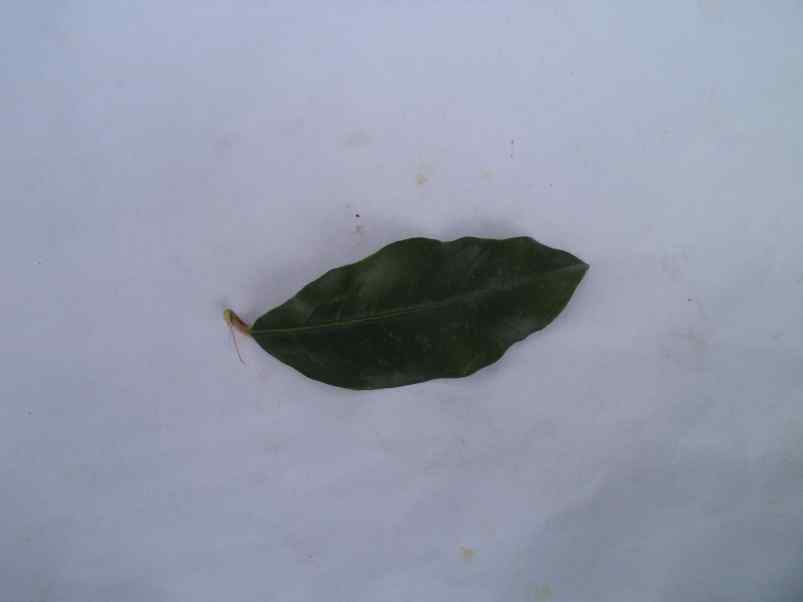

In [ ]:
from google.colab.patches import cv2_imshow
testImage = cv2.imread(FilePath)#, cv2.IMREAD_GRAYSCALE)#read image in grayscale
#print('Test image size=', str(test_image_array.size))
#plt.imshow(test_image, cmap='gray')
#plt.title('Input image')
#plt.show()
cv2_imshow(testImage)


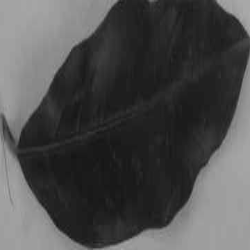

In [ ]:
croped_image = LeafDetect(testImage)

test_image_resize = cv2.resize(croped_image, (RH, RW))# resizei mage to 125x125
#plt.imshow(test_image_resize, cmap='gray')
#plt.title('test image')
#plt.show()
cv2_imshow(test_image_resize)

test_image_resize = test_image_resize/255.0 # change 0,255 to 0,1 range


prediction=[0.48613665 0.5138633 ]
Prediction Val=0.5138633
Prediction ID :1
Disease type = Bacterial Blight
---Desease cure---------
Reference: https://www.krishisewa.com/articles/disease-management/398-pomegranate-diseases.html


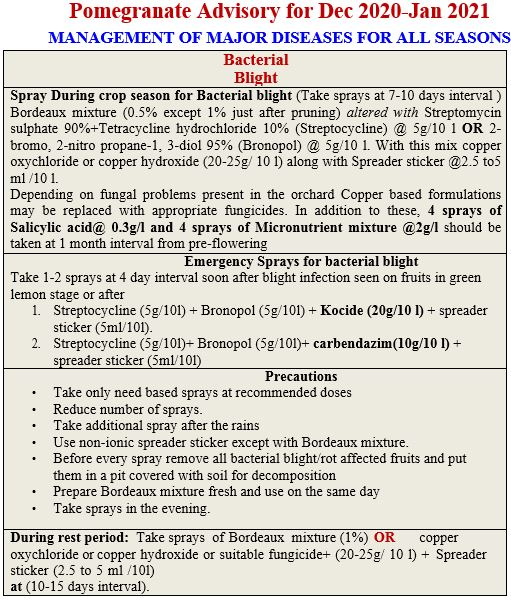

In [ ]:
test_image_reshape = np.array(test_image_resize).reshape(-1, RH, RW, 1) # reshape for neural network prediction
prediction = np.array(model.predict(test_image_reshape))[0]  # prect the image
print('prediction='+str(prediction))
MaxPredict = np.amax(prediction) # find the maximum value
print('Prediction Val='+str(MaxPredict))

result = np.array(np.where(prediction == MaxPredict))[0] # find which has maximum value
print('Prediction ID :'+str(result[0]))
dis = ['Healthy', 'Bacterial Blight'] # disease names array
print('Disease type = '+dis[np.int(result)]) # display disease name

# Disease cure
print('---Desease cure---------')
print('Reference: https://www.krishisewa.com/articles/disease-management/398-pomegranate-diseases.html')


if result == 1: # if image is diseased display solution
    Ibb = cv2.imread(os.path.join(Colab_Path,'solution','bacterial blight1.JPG')) # read disease cure image
    cv2_imshow(Ibb)